# SAVITSKY GOLAY FILTERING 

In [2]:
import matplotlib.dates as mdates

In [3]:
#import the essential library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, general_gaussian
import statsmodels

C:\Users\Dell\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
#loading of the data

data=pd.read_csv("E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/11.08/ndvi/p1.csv")
data


,date,NDVI_p1
0,"Jan 4, 2021",0.659753
1,"Jan 9, 2021",0.525199
2,"Jan 14, 2021",0.010833
3,"Jan 19, 2021",0.646873
4,"Feb 3, 2021",0.098306
5,"Feb 8, 2021",0.747664
6,"Feb 18, 2021",0.696852
7,"Feb 23, 2021",0.806154
8,"Feb 28, 2021",0.774941
9,"Mar 5, 2021",0.818840


In [4]:
#pip install statsmodels

In [15]:
#values put into different array
x = data['date'].values   #date
y = data['NDVI_p1'].values   #NDVI values

type(x)
x


array(['Jan 4, 2021', 'Jan 9, 2021', 'Jan 14, 2021', 'Jan 19, 2021',
       'Feb 3, 2021', 'Feb 8, 2021', 'Feb 18, 2021', 'Feb 23, 2021',
       'Feb 28, 2021', 'Mar 5, 2021', 'Mar 10, 2021', 'Mar 15, 2021',
       'Mar 20, 2021', 'Mar 25, 2021', 'Mar 30, 2021', 'Apr 4, 2021',
       'Apr 9, 2021', 'Apr 19, 2021', 'Apr 24, 2021', 'Apr 29, 2021',
       'May 4, 2021', 'May 9, 2021', 'May 14, 2021', 'May 24, 2021',
       'May 29, 2021', 'Jun 3, 2021', 'Jun 8, 2021', 'Jun 23, 2021',
       'Jun 28, 2021', 'Jul 8, 2021', 'Aug 12, 2021', 'Aug 17, 2021',
       'Aug 27, 2021', 'Sep 16, 2021', 'Sep 26, 2021', 'Oct 6, 2021',
       'Oct 11, 2021', 'Oct 16, 2021', 'Oct 21, 2021', 'Oct 26, 2021',
       'Oct 31, 2021', 'Nov 5, 2021', 'Nov 10, 2021', 'Nov 15, 2021',
       'Nov 20, 2021', 'Nov 25, 2021', 'Nov 30, 2021', 'Dec 5, 2021',
       'Dec 10, 2021', 'Dec 15, 2021', 'Dec 20, 2021', 'Dec 25, 2021'],
      dtype=object)

In [17]:
data_copy1= data.copy()


In [18]:
data_copy1

,date,NDVI_p1
0,"Jan 4, 2021",0.659753
1,"Jan 9, 2021",0.525199
2,"Jan 14, 2021",0.010833
3,"Jan 19, 2021",0.646873
4,"Feb 3, 2021",0.098306
5,"Feb 8, 2021",0.747664
6,"Feb 18, 2021",0.696852
7,"Feb 23, 2021",0.806154
8,"Feb 28, 2021",0.774941
9,"Mar 5, 2021",0.818840


In [19]:
data_copy1['date'] = pd.to_datetime(data_copy1['date'])
print(data_copy1.dtypes)

date       datetime64[ns]
NDVI_p1           float64
dtype: object


In [20]:
import pandas as pddate

# Assuming 'system:time_start' is already in a datetime format
data_copy1['Month'] = data_copy1['date'].dt.strftime('%b')



In [21]:
data_copy1

,date,NDVI_p1,Month
0,2021-01-04,0.659753,Jan
1,2021-01-09,0.525199,Jan
2,2021-01-14,0.010833,Jan
3,2021-01-19,0.646873,Jan
4,2021-02-03,0.098306,Feb
5,2021-02-08,0.747664,Feb
6,2021-02-18,0.696852,Feb
7,2021-02-23,0.806154,Feb
8,2021-02-28,0.774941,Feb
9,2021-03-05,0.818840,Mar


In [11]:
plt.style.use('_mpl-gallery-nogrid')


In [39]:
plt.style.available 

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [22]:
# w = 23 #width of the selection window
# p = 6 #polynomial to be fitted to the data 
# y_smooth_2 = savgol_filter(y, w, polyorder = p, deriv=0)

w1=5
p1= 2
y_smooth_1 = savgol_filter(y, w1, polyorder = p1, deriv=0)

w2=7
p2=3
y_smooth_3 = savgol_filter(y, w2, polyorder = p2, deriv=0)



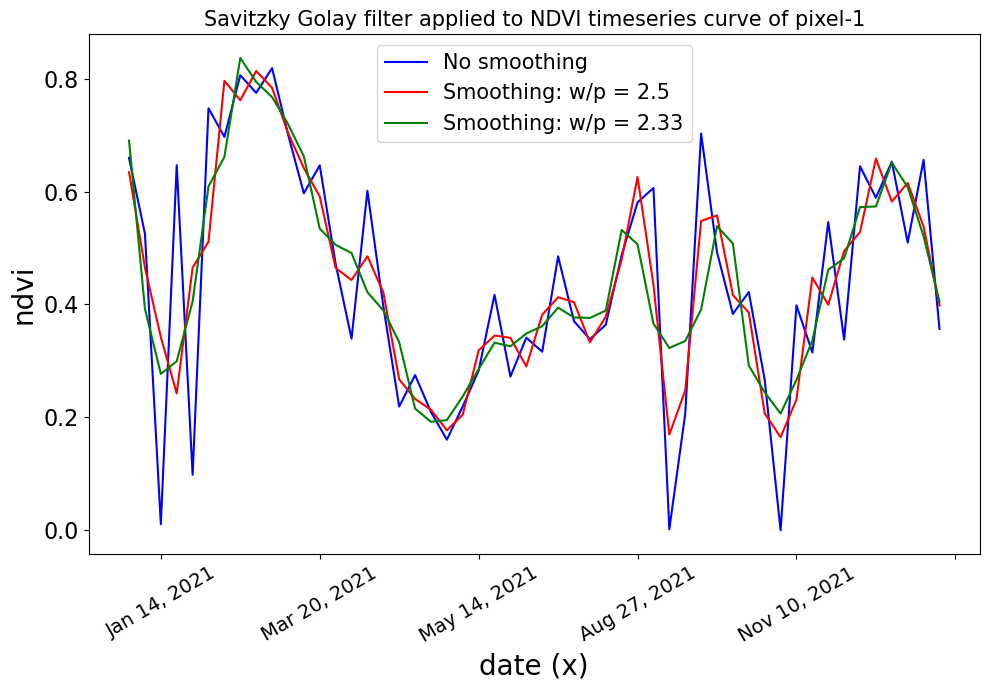

In [23]:
plt.figure(figsize=(10,7))
interval = np.arange(50)
plt.plot(x, y, 'b', label = 'No smoothing')
plt.yticks(fontsize=16)
plt.xticks(rotation=30,fontsize =14)
plt.plot(x, y_smooth_1, 'r', label = 'Smoothing: w/p = 2.5')
#plt.plot(x, y_smooth_2, 'g', label = 'Smoothing: w/p = 3.8')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Skip every 2 days
plt.plot(x, y_smooth_3, 'g', label = 'Smoothing: w/p = 2.33')
plt.xlabel("date (x)",fontsize=20)
plt.ylabel("ndvi",fontsize=20)
plt.title('Savitzky Golay filter applied to NDVI timeseries curve of pixel-1',fontsize=15)
plt.tight_layout()
plt.legend(loc='lower right')
plt.legend(fontsize=15)

plt.savefig('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/new graphs/savgol/savgol_p1.png')  # Change 'output_graph.png' to your desired file name

plt.show()

In [211]:
columns_to_convert = ['1']  # Replace with the column names you want to convert

data_copy1[columns_to_convert] = data_copy1[columns_to_convert].astype(object)

KeyError: "None of [Index(['1'], dtype='object')] are in the [columns]"

In [13]:
data_copy1.set_index('system:time_start', inplace=True) 


In [14]:
data_copy1

,0,Month
system:time_start,,
2021-01-04,0.415,Jan
2021-01-09,0.248,Jan
2021-01-14,0.019,Jan
2021-01-19,0.483,Jan
2021-02-03,0.343,Feb
2021-02-08,0.599,Feb
2021-02-18,0.556,Feb
2021-02-23,0.596,Feb
2021-02-28,0.624,Feb


In [51]:
import seaborn as sns

<AxesSubplot:xlabel='Month', ylabel='average values'>

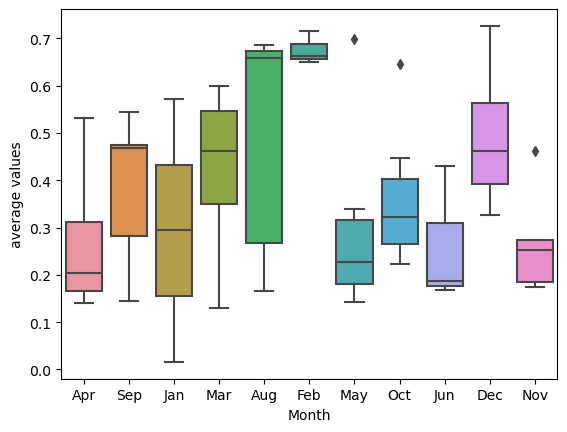

In [53]:
#sns.boxplot(x='year', y='Passengers', data=df)
sns.boxplot(x='Month', y='average values', data=data_copy1)


## Savitsky-golay filtering for the data with discontinuous values distributed randomly

In [15]:
# In this part i have removed 20 rows from the original dataframe 
#first we will define a new data frame which contains all the samples from the 
new_df = pd.DataFrame(data)
print (new_df)
new_df.shape[0]

   system:time_start      0
0        Jan 4, 2021  0.415
1        Jan 9, 2021  0.248
2       Jan 14, 2021  0.019
3       Jan 19, 2021  0.483
4        Feb 3, 2021  0.343
5        Feb 8, 2021  0.599
6       Feb 18, 2021  0.556
7       Feb 23, 2021  0.596
8       Feb 28, 2021  0.624
9        Mar 5, 2021  0.606
10      Mar 10, 2021  0.595
11      Mar 15, 2021  0.451
12      Mar 20, 2021  0.537
13      Mar 25, 2021  0.396
14      Mar 30, 2021  0.258
15       Apr 4, 2021  0.315
16       Apr 9, 2021  0.280
17      Apr 19, 2021  0.161
18      Apr 24, 2021  0.238
19      Apr 29, 2021  0.173
20       May 4, 2021  0.151
21       May 9, 2021  0.162
22      May 14, 2021  0.178
23      May 24, 2021  0.216
24      May 29, 2021  0.162
25       Jun 3, 2021  0.129
26       Jun 8, 2021  0.186
27      Jun 23, 2021  0.196
28      Jun 28, 2021  0.204
29       Jul 8, 2021  0.258
30      Aug 12, 2021  0.637
31      Aug 17, 2021  0.575
32      Aug 27, 2021  0.579
33      Sep 16, 2021  0.344
34      Sep 26, 2021

52

In [16]:
n_remove = 20
df1 = new_df.sample(n=len(new_df)-n_remove).sort_index()  # the code creates a new DataFrame df1, which is a random subset of the original DataFrame new_df, but with n_remove rows removed. The order of the remaining rows in df1 is preserved as they were in the original DataFrame new_df. The number of rows in df1 will be len(new_df) - n_remove.
df1

,system:time_start,0
2,"Jan 14, 2021",0.019
3,"Jan 19, 2021",0.483
5,"Feb 8, 2021",0.599
6,"Feb 18, 2021",0.556
7,"Feb 23, 2021",0.596
8,"Feb 28, 2021",0.624
10,"Mar 10, 2021",0.595
11,"Mar 15, 2021",0.451
15,"Apr 4, 2021",0.315
16,"Apr 9, 2021",0.280


In [17]:
# then like above we create the array for each column x1 and y1
x1 = df1['system:time_start'].values   #date
y1 = df1['0'].values   #NDVI values


In [21]:
w1=29
p1= 12
y1_smooth_1 = savgol_filter(y1, w1, polyorder = p1, deriv=0)

w = 31 #width of the selection window
p = 10 #polynomial to be fitted to the data 
y1_smooth_2 = savgol_filter(y1, w, polyorder = p, deriv=0)

#w2=55
#p2=10
#y1_smooth_3 = savgol_filter(y1, w2, polyorder = p2, deriv=0)

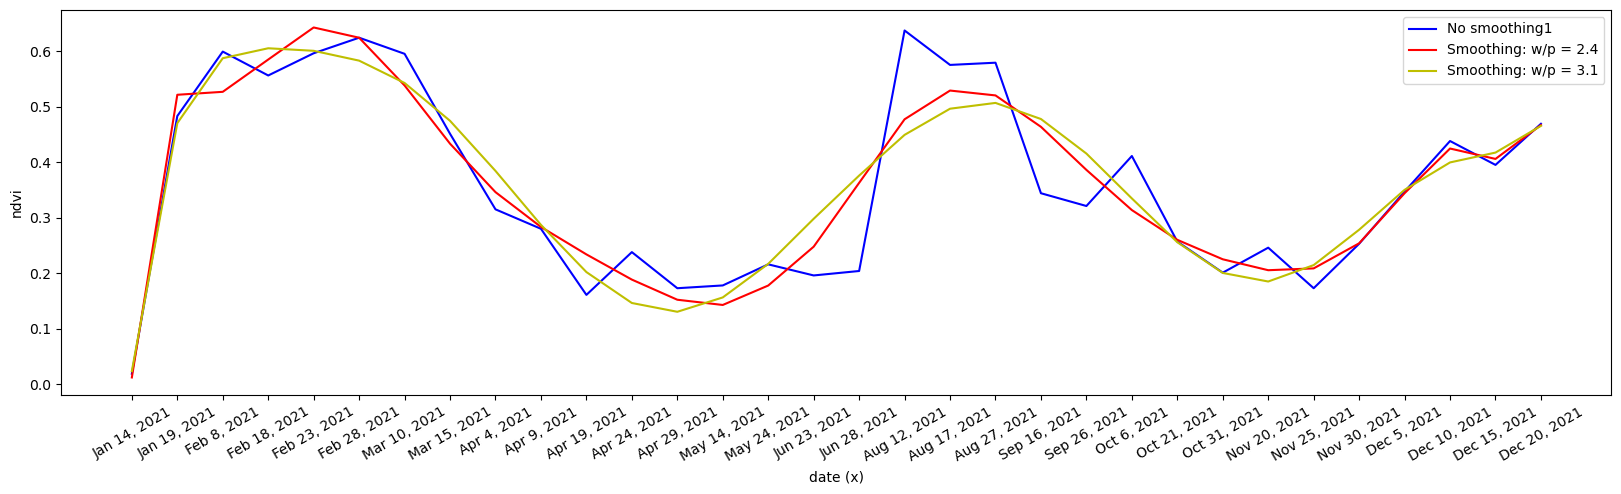

In [23]:
plt.figure(figsize=(20,5))
plt.plot(x1, y1, 'b', label = 'No smoothing1')
plt.xticks(rotation =30)

plt.plot(x1, y1_smooth_1, 'r', label = 'Smoothing: w/p = 2.4')
plt.plot(x1, y1_smooth_2, 'y', label = 'Smoothing: w/p = 3.1')
#plt.plot(x1, y1_smooth_3, 'y', label = 'Smoothing: w/p = 5.5')
plt.xlabel("date (x)")
plt.ylabel("ndvi")
plt.legend()
plt.show()



#in this case the smoothining of the curve by the savitsky golay filter seems better in some parts than the case with the complete set of data 
#although it is hard to tell at what w/p parameter the s-g filter performs well


## Savitsky-golay filtering for the data with nan values distributed randomly

In [29]:
#creating a data with Nan values 


# Create a sample data frame
df = pd.DataFrame(data)

# Display the original data frame
print("Original data frame:")
print(df)

# Make a copy of the data frame
random_nan_df = df.copy()

# Defining the  fraction of values to be replaced by Nan
frac = 0.1

# Replace values randomly by Nan in the copy
random_nan_df['0'] = random_nan_df['0'].mask(np.random.random(random_nan_df['0'].shape) < frac)

# Display the modified data frame with 30%NaN values
print("Modified data frame:")
print(random_nan_df)



Original data frame:
   system:time_start      0
0        Jan 4, 2021  0.415
1        Jan 9, 2021  0.248
2       Jan 14, 2021  0.019
3       Jan 19, 2021  0.483
4        Feb 3, 2021  0.343
5        Feb 8, 2021  0.599
6       Feb 18, 2021  0.556
7       Feb 23, 2021  0.596
8       Feb 28, 2021  0.624
9        Mar 5, 2021  0.606
10      Mar 10, 2021  0.595
11      Mar 15, 2021  0.451
12      Mar 20, 2021  0.537
13      Mar 25, 2021  0.396
14      Mar 30, 2021  0.258
15       Apr 4, 2021  0.315
16       Apr 9, 2021  0.280
17      Apr 19, 2021  0.161
18      Apr 24, 2021  0.238
19      Apr 29, 2021  0.173
20       May 4, 2021  0.151
21       May 9, 2021  0.162
22      May 14, 2021  0.178
23      May 24, 2021  0.216
24      May 29, 2021  0.162
25       Jun 3, 2021  0.129
26       Jun 8, 2021  0.186
27      Jun 23, 2021  0.196
28      Jun 28, 2021  0.204
29       Jul 8, 2021  0.258
30      Aug 12, 2021  0.637
31      Aug 17, 2021  0.575
32      Aug 27, 2021  0.579
33      Sep 16, 2021  0.344

In [30]:
x2 = random_nan_df['system:time_start'].values   #date
y2 = random_nan_df['0'].values   #NDVI values
y2

array([0.415, 0.248, 0.019,   nan, 0.343, 0.599, 0.556, 0.596, 0.624,
       0.606, 0.595, 0.451, 0.537,   nan, 0.258, 0.315, 0.28 , 0.161,
       0.238, 0.173, 0.151, 0.162, 0.178, 0.216, 0.162, 0.129, 0.186,
       0.196, 0.204, 0.258, 0.637, 0.575,   nan, 0.344, 0.321, 0.411,
       0.426, 0.336, 0.257, 0.297, 0.201, 0.139, 0.23 , 0.16 , 0.246,
       0.173, 0.253, 0.347, 0.438, 0.395, 0.469, 0.288])

In [33]:

w2=29
p1= 12
y1_smooth_1 = savgol_filter(y1, w2, polyorder = p1, deriv=0)

w = 31 #width of the selection window
p = 10#polynomial to be fitted to the data 
y1_smooth_2 = savgol_filter(y1, w, polyorder = p, deriv=0)


#w2=55
#p2=10
#y2_smooth_3 = savgol_filter(y2, w2, polyorder = p2, deriv=0)

Current Working Directory: E:\pgd\PGD-GI Study Material\final project\NDVI\python docs\2-08-2023\2-08-2023


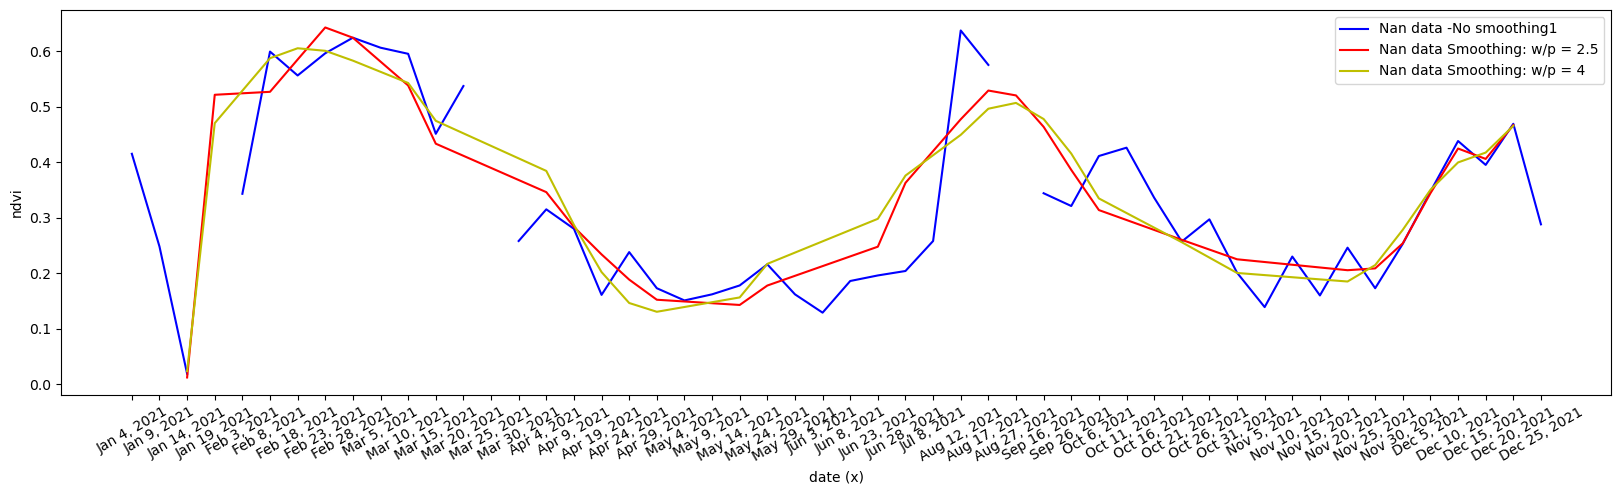

In [70]:
import os
plt.figure(figsize=(20,5))
plt.xticks(rotation =30)
plt.plot(x2, y2, 'b', label = 'Nan data -No smoothing1')
plt.plot(x1, y1_smooth_1, 'r', label = 'Nan data Smoothing: w/p = 2.5')
plt.plot(x1, y1_smooth_2, 'y', label = 'Nan data Smoothing: w/p = 4')
#plt.plot(x1, y1_smooth_3, 'y', label = 'Smoothing: w/p = 5.5')
#plt.plot(x, y_smooth_2, 'r', label = 'normal data Smoothing: w/p = 4')
plt.xlabel("date (x)")
plt.ylabel("ndvi")
plt.legend()




# Print the current working directory
print("Current Working Directory:", os.getcwd())

# Save the graph as a JPEG file
file_path = "E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/clipped_images.jpeg"
plt.savefig(file_path, format='jpeg')


plt.show()


# MOVING AVERAGE FILTER 

In [73]:
#Moving average refers to a series of averages of fixed size subsets of the total set of observations.
#It is also known as rolling average, running average, rolling means or running average.
#Consider the set of n observations and k be the size of the window for determining the average at any time t. 
#Then moving average list is calculated by initially taking the average of the first k observations present in the current window and storing it in the list. 
#Now, the window is expanded according to the condition of the moving average to be determined and again average of the elements present in the window is calculated and stored in the list. 
#This process is continued until the window has reached the end of the set. 

In [254]:
#loading of the data

data=pd.read_csv("E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/11.08/ndvi/p3.csv")
data

,date,NDVI_p3
0,"Jan 4, 2021",0.372289
1,"Jan 9, 2021",0.400536
2,"Jan 14, 2021",0.021390
3,"Jan 19, 2021",0.352909
4,"Feb 3, 2021",0.338322
5,"Feb 8, 2021",0.282356
6,"Feb 18, 2021",0.296159
7,"Feb 23, 2021",0.377588
8,"Feb 28, 2021",0.306111
9,"Mar 5, 2021",0.373810


In [255]:
#values put into different array
x = data['date'].values   #date
y = data['NDVI_p3'].values   #NDVI values

type(x)
y

array([0.372289 , 0.400536 , 0.0213904, 0.352909 , 0.338322 , 0.282356 ,
       0.296159 , 0.377588 , 0.306111 , 0.37381  , 0.287617 , 0.339286 ,
       0.19615  , 0.263677 , 0.18894  , 0.393747 , 0.151285 , 0.174136 ,
       0.240421 , 0.12741  , 0.1163   , 0.108869 , 0.154281 , 0.174878 ,
       0.147293 , 0.185864 , 0.130649 , 0.23888  , 0.17151  , 0.189967 ,
       0.455045 , 0.370912 , 0.205543 , 0.314572 , 0.346583 , 0.257584 ,
       0.306802 , 0.192275 , 0.253029 , 0.297978 , 0.268727 , 0.       ,
       0.177042 , 0.135563 , 0.395652 , 0.14463  , 0.209634 , 0.144573 ,
       0.187856 , 0.161378 , 0.1755725, 0.141279 ])

In [256]:

#Import libraries 
from pandas import Series

#Define window size
w=5
w1=10
w2=20

# #Define mask and store as an array
# mask=np.ones((1,w))/w
# mask=mask[0,:]

In [257]:
y_moving_average=np.convolve(data['NDVI_p3'],np.ones(w),mode='same')
y_moving_average /= w
y1_moving_average=np.convolve(data['NDVI_p3'],np.ones(w1),mode='same')
y1_moving_average /= w1
y2_moving_average=np.convolve(data['NDVI_p3'],np.ones(w2),mode='same')
y2_moving_average /= w2



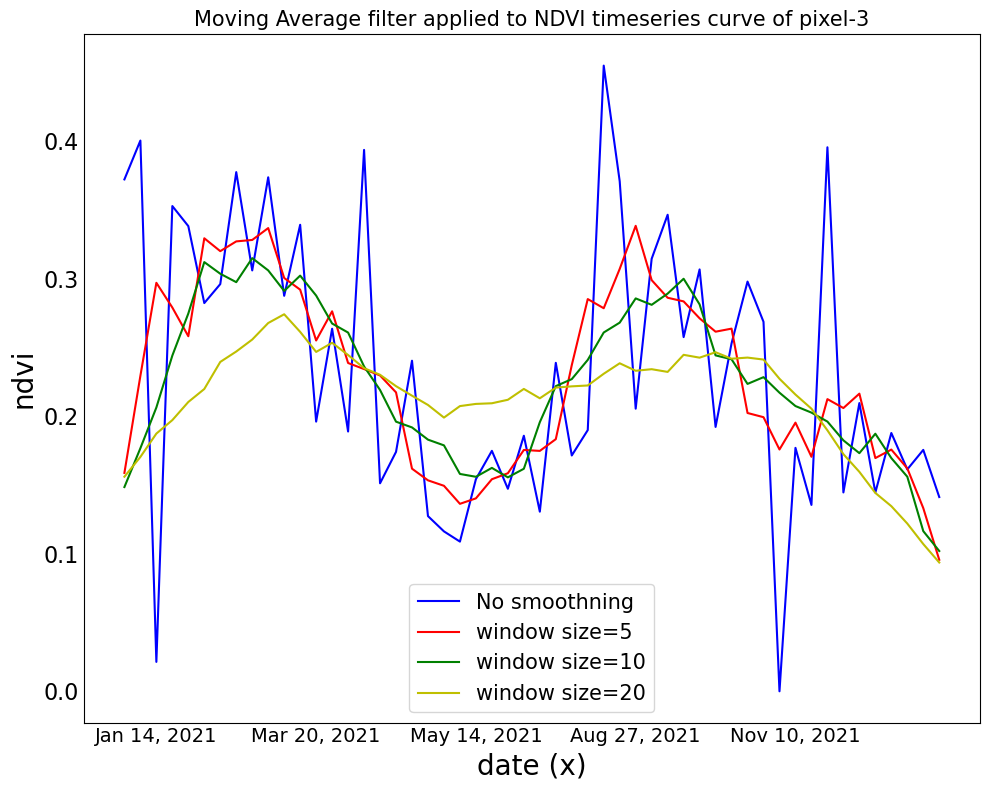

In [258]:
#Plot both original and smooth data
plt.figure(figsize=(10,8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.plot(x, y, 'b', label = 'No smoothning')
plt.plot(x, y_moving_average, 'r', label = 'window size=5')
plt.plot(x, y1_moving_average, 'g', label = 'window size=10')
plt.plot(x, y2_moving_average, 'y', label = 'window size=20')

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Skip every 2 days
plt.title('Moving Average filter applied to NDVI timeseries curve of pixel-3',fontsize=15)
plt.xlabel("date (x)",fontsize=20)
plt.ylabel("ndvi",fontsize=20)
plt.tight_layout()
plt.legend(fontsize=15)
plt.savefig('E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/new graphs/moving average/mov_avg_p3.png')  # Change 'output_graph.png' to your desired file name
plt.tight_layout()


# import os

# # ... (rest of your code)

# # Print the current working directory
# print("Current Working Directory:", os.getcwd())

# # Save the graph as a JPEG file
# file_path = "E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/moving average1.jpeg"
# plt.savefig(file_path, format='jpeg')

# # Show the plot (optional)
plt.show()

#Increasing the window size decreases the accuracy of the curve and over smooth the curve 

## Moving average filtering for the data with discontinuous values distributed randomly

In [88]:
y_moving_average=np.convolve(df1['0'],np.ones(w),mode='same')
y_moving_average /= w
y1_moving_average=np.convolve(df1['0'],np.ones(w1),mode='same')
y1_moving_average /= w1
y2_moving_average=np.convolve(df1['0'],np.ones(w2),mode='same')
y2_moving_average /= w2


Current Working Directory: E:\pgd\PGD-GI Study Material\final project\NDVI\python docs\2-08-2023\2-08-2023


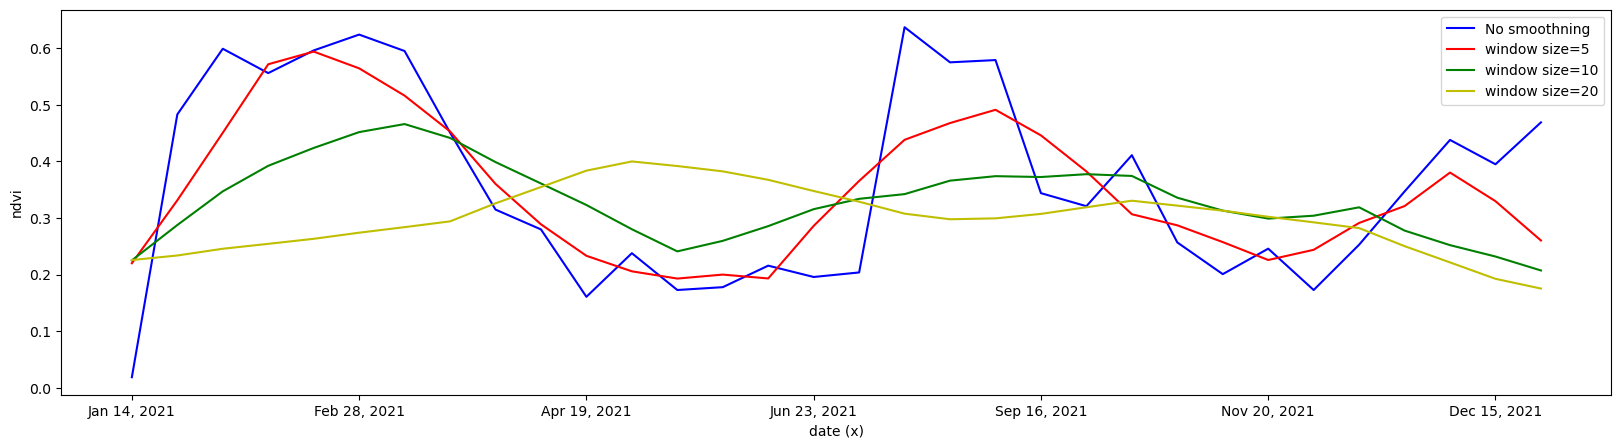

In [89]:
plt.figure(figsize=(20,5))

plt.plot(x1, y1, 'b', label = 'No smoothning')
plt.plot(x1, y_moving_average, 'r', label = 'window size=5')
plt.plot(x1, y1_moving_average, 'g', label = 'window size=10')
plt.plot(x1, y2_moving_average, 'y', label = 'window size=20')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Skip every 2 days


plt.xlabel("date (x)")
plt.ylabel("ndvi")
plt.legend()

import os

# ... (rest of your code)

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# Save the graph as a JPEG file
file_path = "E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/moving average2.jpeg"
plt.savefig(file_path, format='jpeg')

plt.show()

## moving average filter with missing/ Nan values 

In [83]:
y_moving_average=np.convolve(random_nan_df['0'],np.ones(w),mode='same')
y_moving_average /= w
y1_moving_average=np.convolve(random_nan_df['0'],np.ones(w1),mode='same')
y1_moving_average /= w1
y2_moving_average=np.convolve(random_nan_df['0'],np.ones(w2),mode='same')
y2_moving_average /= w2



Current Working Directory: E:\pgd\PGD-GI Study Material\final project\NDVI\python docs\2-08-2023\2-08-2023


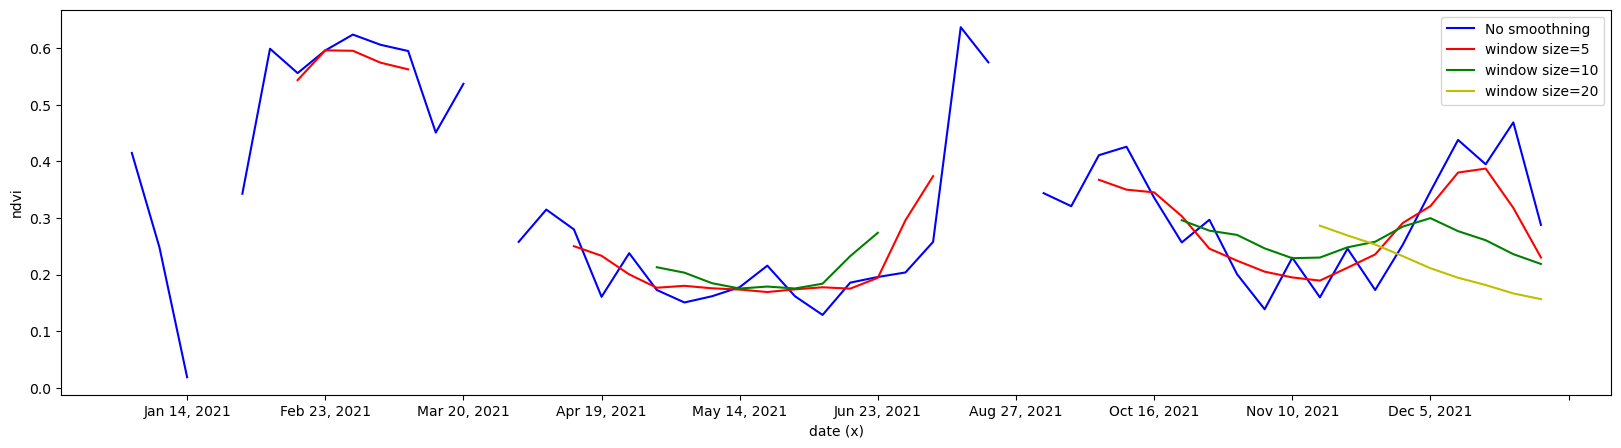

In [86]:
#Plot both original and smooth data
plt.figure(figsize=(20,5))
#plt.xticks(rotation =30)
plt.plot(x2, y2, 'b', label = 'No smoothning')
plt.plot(x2, y_moving_average, 'r', label = 'window size=5')
plt.plot(x2, y1_moving_average, 'g', label = 'window size=10')
plt.plot(x2, y2_moving_average, 'y', label = 'window size=20')

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Skip every 2 days

plt.xlabel("date (x)")
plt.ylabel("ndvi")
plt.legend()

import os

# ... (rest of your code)

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# Save the graph as a JPEG file
file_path = "E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/moving average3.jpeg"
plt.savefig(file_path, format='jpeg')

plt.show()


### Trying smaller window sizes 

In [58]:
#Define window size
w_nan=1
w1_nan=2
w2_nan=4

In [59]:
ynan_moving_average=np.convolve(random_nan_df['0'],np.ones(w_nan),mode='same')
ynan_moving_average /= w_nan
y1nan_moving_average=np.convolve(random_nan_df['0'],np.ones(w1_nan),mode='same')
y1nan_moving_average /= w1_nan
y2nan_moving_average=np.convolve(random_nan_df['0'],np.ones(w2_nan),mode='same')
y2nan_moving_average /= w2_nan


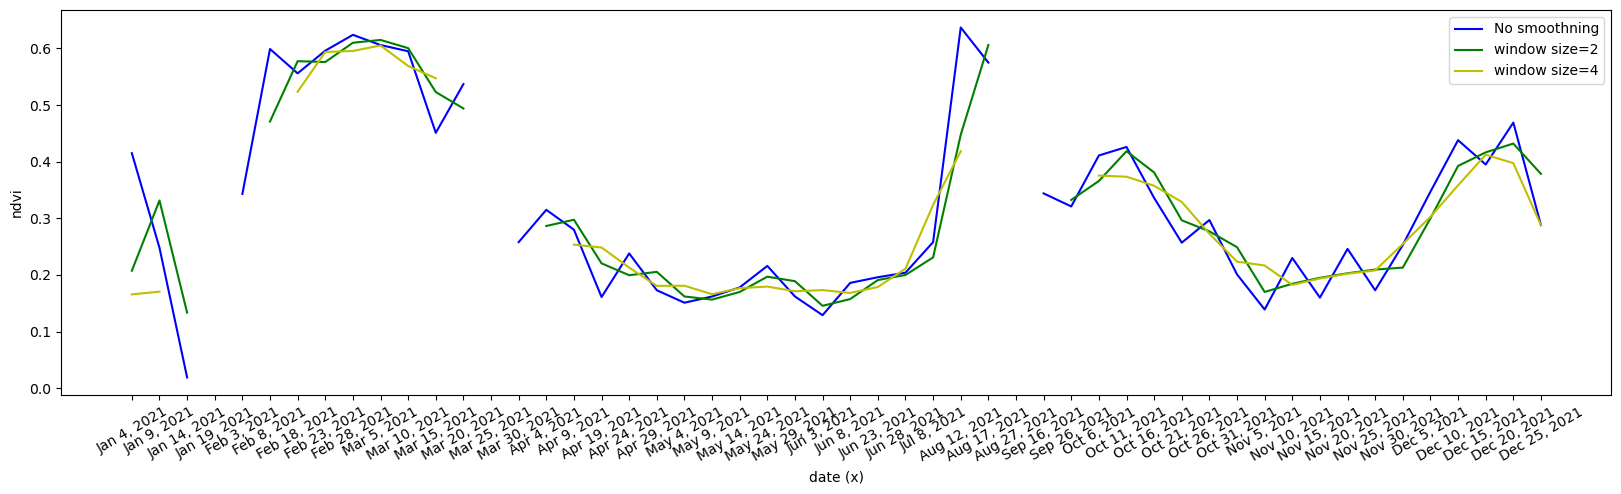

<Figure size 640x480 with 0 Axes>

In [60]:
#Plot both original and smooth data
plt.figure(figsize=(20,5))
plt.xticks(rotation =30)
plt.plot(x2, y2, 'b', label = 'No smoothning')
#plt.plot(x, ynan_moving_average, 'r', label = 'window size=1')
plt.plot(x, y1nan_moving_average, 'g', label = 'window size=2')
plt.plot(x, y2nan_moving_average, 'y', label = 'window size=4')


plt.xlabel("date (x)")
plt.ylabel("ndvi")
plt.legend()
plt.show()

save_path = "E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/graphs/moving average/"
filename = "ma3.jpg"
plt.savefig(save_path + filename)


#

In [42]:
# Convert date strings to datetime objects
datetime_objects = pd.to_datetime(x_gauss, format='%d-%m-%Y')

# Convert datetime objects to timestamps (numeric representation)
timestamps = datetime_objects.view('int64')  / 10**9  # Divide by 10^9 to get timestamps in seconds (float)

# Convert timestamps to floats if needed (timestamps are already float values)
float_values = timestamps.astype(float)

print(float_values)

NameError: name 'x_gauss' is not defined

In [82]:
import matplotlib.dates as mdates

Current Working Directory: E:\pgd\PGD-GI Study Material\final project\NDVI\python docs\2-08-2023\2-08-2023


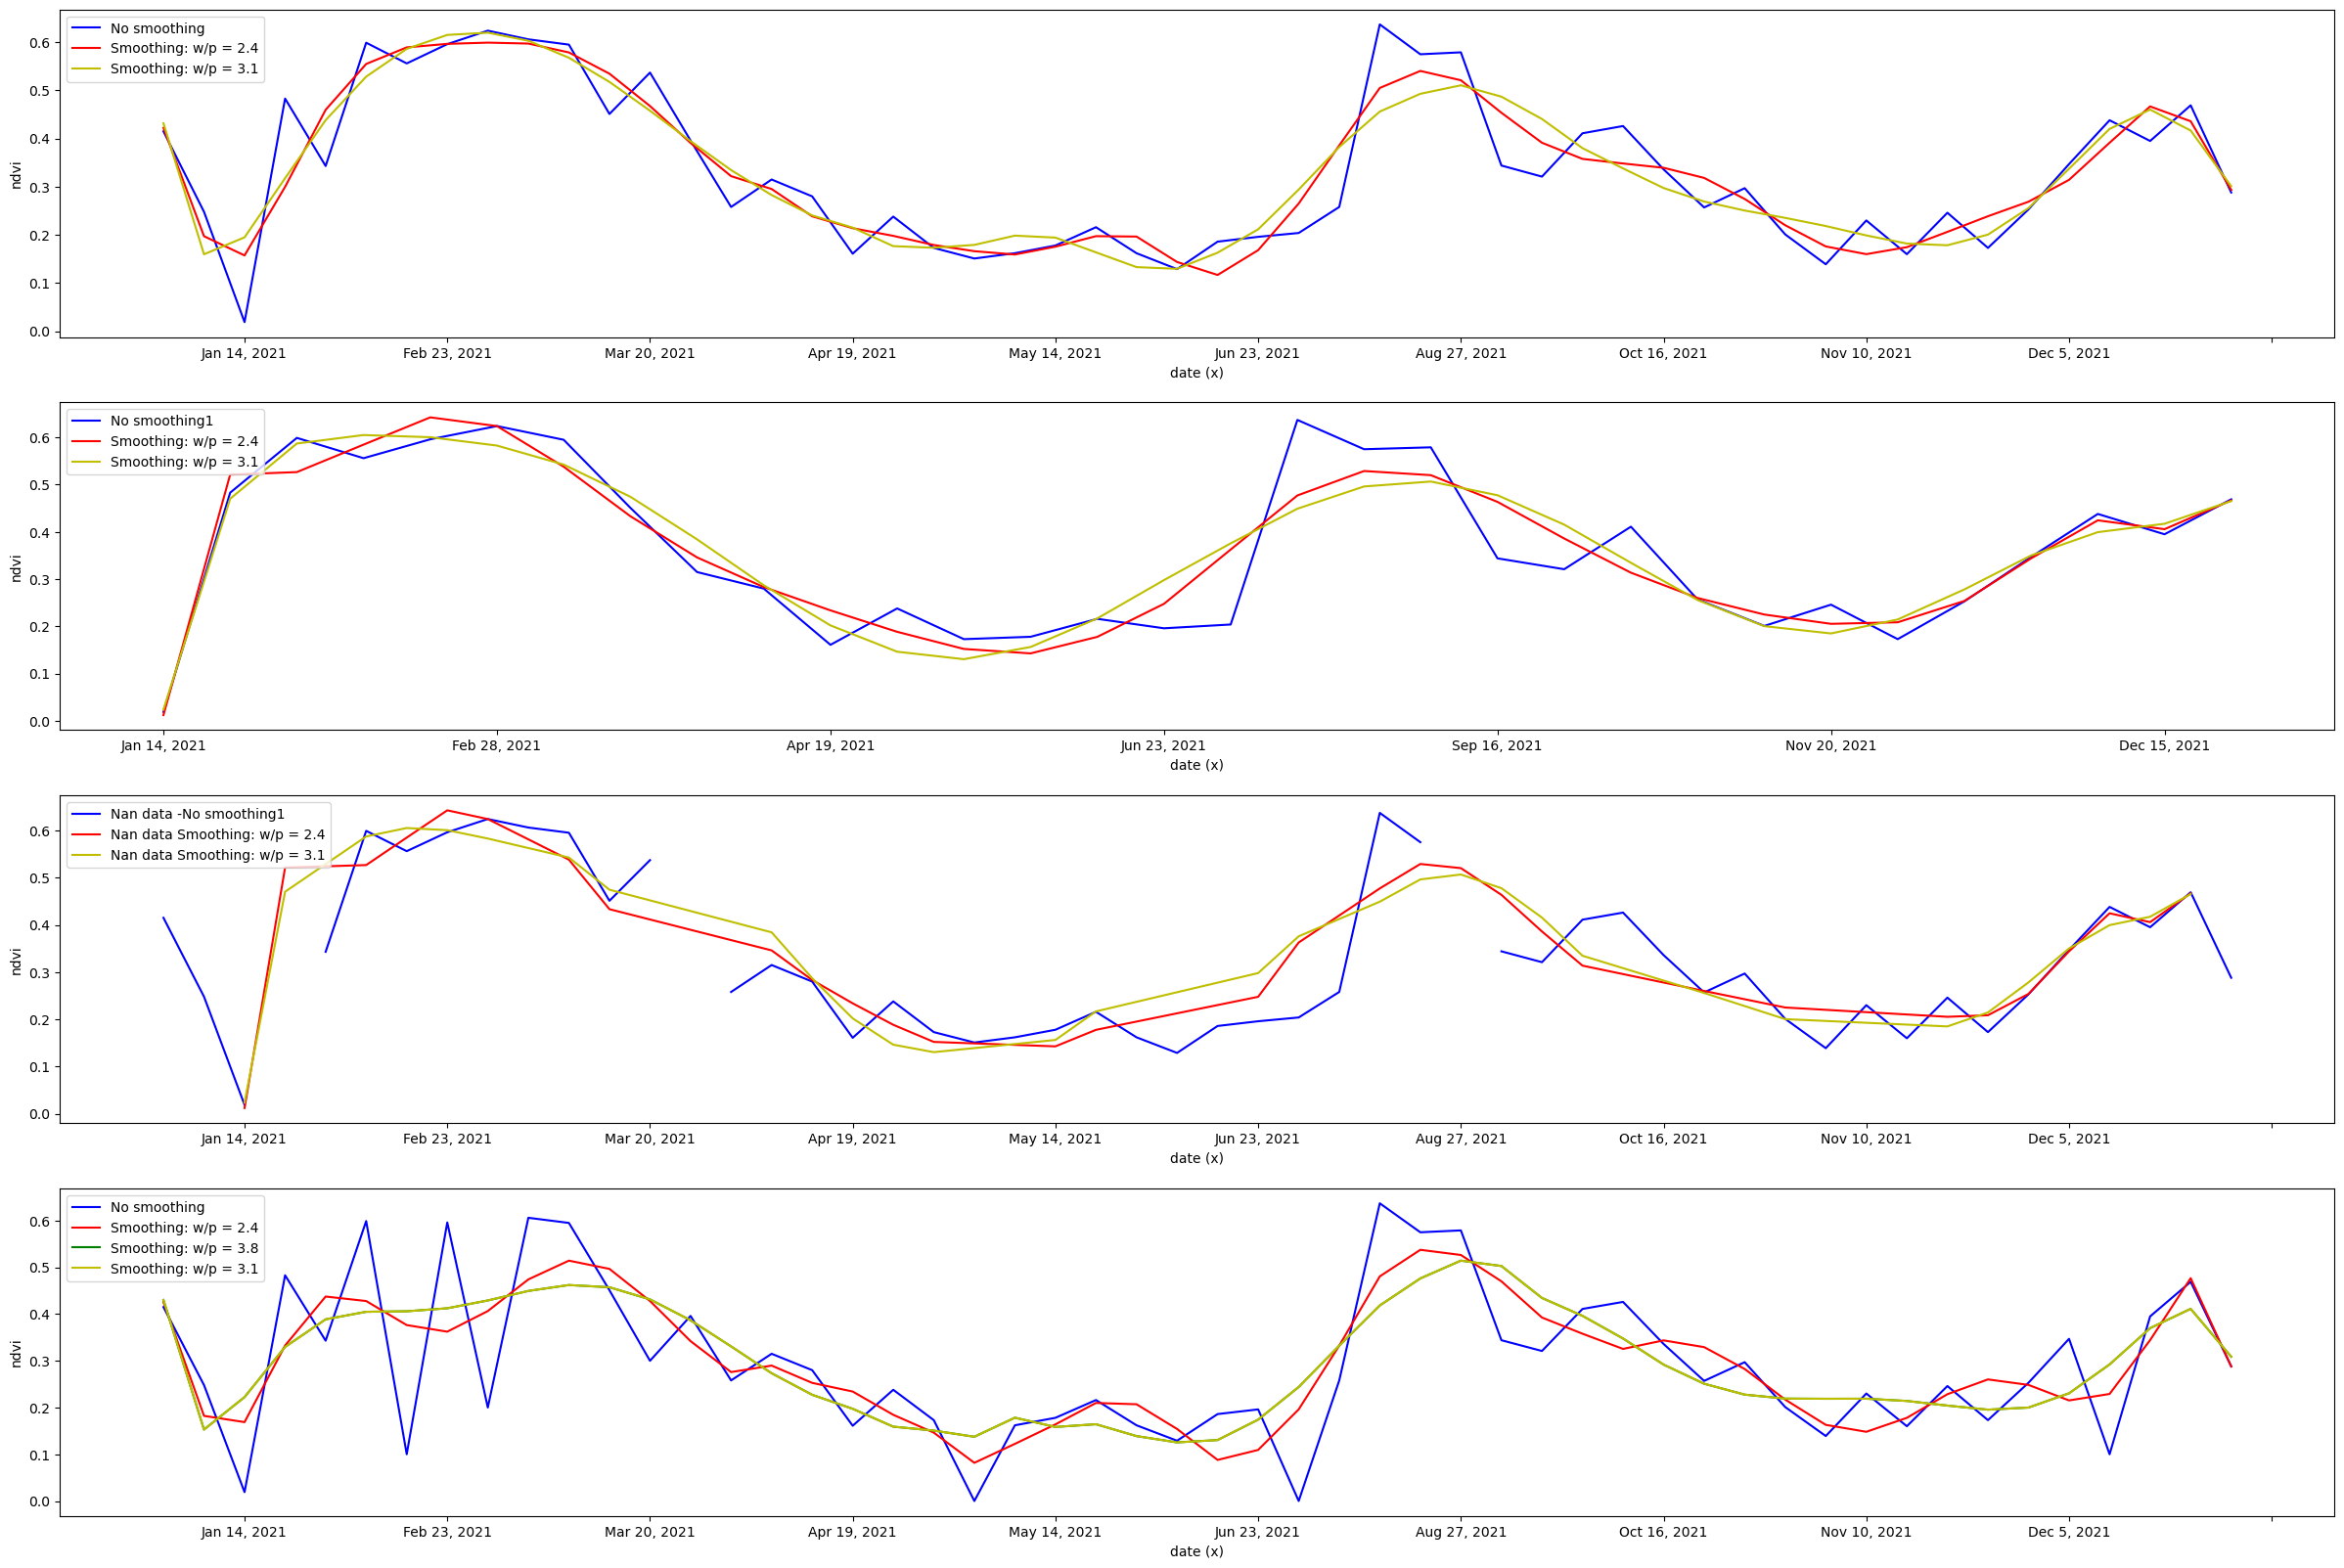

In [91]:
plt.figure(figsize=(30,20))

plt.subplot(411)
plt.plot(x, y, 'b', label = 'No smoothing')
plt.plot(x, y_smooth_1, 'r', label = 'Smoothing: w/p = 2.4')
plt.plot(x, y_smooth_3, 'y', label = 'Smoothing: w/p = 3.1')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Skip every 2 days
plt.xlabel("date (x)")
plt.ylabel("ndvi")

plt.subplot(412)
plt.plot(x1, y1, 'b', label = 'No smoothing1')
plt.plot(x1, y1_smooth_1, 'r', label = 'Smoothing: w/p = 2.4')
plt.plot(x1, y1_smooth_2, 'y', label = 'Smoothing: w/p = 3.1')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Skip every 2 days
plt.xlabel("date (x)")
plt.ylabel("ndvi")




plt.subplot(413)
plt.plot(x2, y2, 'b', label = 'Nan data -No smoothing1')
plt.plot(x1, y1_smooth_1, 'r', label = 'Nan data Smoothing: w/p = 2.4')
plt.plot(x1, y1_smooth_2, 'y', label = 'Nan data Smoothing: w/p = 3.1')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Skip every 2 days
plt.xlabel("date (x)")
plt.ylabel("ndvi")


plt.subplot(414)

interval = np.arange(50)
plt.plot(xs, ys, 'b', label = 'No smoothing')
plt.plot(xs, ys_smooth , 'r', label = 'Smoothing: w/p = 2.4')
plt.plot(x, ys_smooth_2, 'g', label = 'Smoothing: w/p = 3.8')
plt.plot(xs, ys_smooth_2, 'y', label = 'Smoothing: w/p = 3.1')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Skip every 2 days


plt.xlabel("date (x)")
plt.ylabel("ndvi")

import os

# ... (rest of your code)

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# Save the graph as a JPEG file
file_path = "E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/savgol_all.jpeg"
plt.savefig(file_path, format='jpeg')

plt.show()




## 

In [36]:
data_copy =pd.read_csv("E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/karnal_copy.csv")
data_copy


,system:time_start,0
0,"Jan 4, 2021",0.415
1,"Jan 9, 2021",0.248
2,"Jan 14, 2021",0.019
3,"Jan 19, 2021",0.483
4,"Feb 3, 2021",0.343
5,"Feb 8, 2021",0.599
6,"Feb 18, 2021",0.100
7,"Feb 23, 2021",0.596
8,"Feb 28, 2021",0.200
9,"Mar 5, 2021",0.606


In [37]:
#values put into different array
xs = data_copy['system:time_start'].values   #date
ys = data_copy['0'].values   #NDVI values

type(xs)
xs

array(['Jan 4, 2021', 'Jan 9, 2021', 'Jan 14, 2021', 'Jan 19, 2021',
       'Feb 3, 2021', 'Feb 8, 2021', 'Feb 18, 2021', 'Feb 23, 2021',
       'Feb 28, 2021', 'Mar 5, 2021', 'Mar 10, 2021', 'Mar 15, 2021',
       'Mar 20, 2021', 'Mar 25, 2021', 'Mar 30, 2021', 'Apr 4, 2021',
       'Apr 9, 2021', 'Apr 19, 2021', 'Apr 24, 2021', 'Apr 29, 2021',
       'May 4, 2021', 'May 9, 2021', 'May 14, 2021', 'May 24, 2021',
       'May 29, 2021', 'Jun 3, 2021', 'Jun 8, 2021', 'Jun 23, 2021',
       'Jun 28, 2021', 'Jul 8, 2021', 'Aug 12, 2021', 'Aug 17, 2021',
       'Aug 27, 2021', 'Sep 16, 2021', 'Sep 26, 2021', 'Oct 6, 2021',
       'Oct 11, 2021', 'Oct 16, 2021', 'Oct 21, 2021', 'Oct 26, 2021',
       'Oct 31, 2021', 'Nov 5, 2021', 'Nov 10, 2021', 'Nov 15, 2021',
       'Nov 20, 2021', 'Nov 25, 2021', 'Nov 30, 2021', 'Dec 5, 2021',
       'Dec 10, 2021', 'Dec 15, 2021', 'Dec 20, 2021', 'Dec 25, 2021'],
      dtype=object)

In [38]:
w1=29
p1= 12
ys_smooth = savgol_filter(ys, w1, polyorder = p1, deriv=0)

w = 31 #width of the selection window
p =10 #polynomial to be fitted to the data 
ys_smooth_2 = savgol_filter(ys, w, polyorder = p, deriv=0)


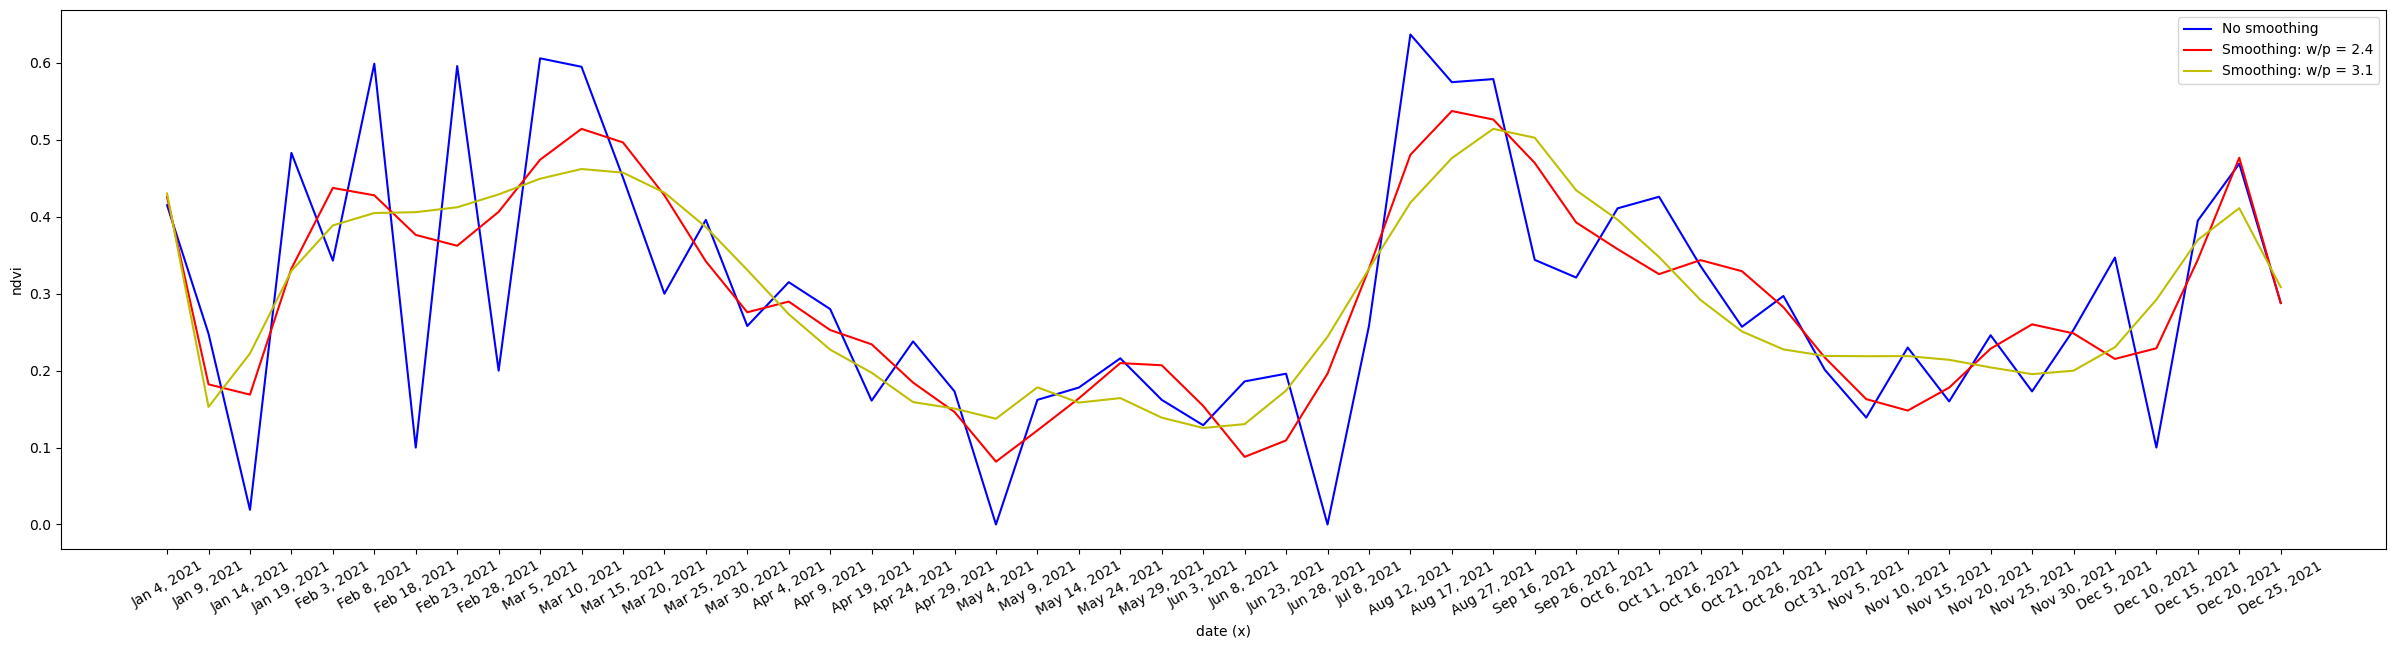

In [40]:
plt.figure(figsize=(30,7))
interval = np.arange(50)
plt.plot(xs, ys, 'b', label = 'No smoothing')
plt.xticks(rotation =30)

plt.plot(xs, ys_smooth , 'r', label = 'Smoothing: w/p = 2.4')
#plt.plot(x, y_smooth_2, 'g', label = 'Smoothing: w/p = 3.8')

plt.plot(xs, ys_smooth_2, 'y', label = 'Smoothing: w/p = 3.1')
plt.xlabel("date (x)")
plt.ylabel("ndvi")
plt.legend()
plt.show()

## moving average 


In [92]:
#Import libraries 
from pandas import Series

#Define window size
w=5
w1=10
w2=20

# #Define mask and store as an array
# mask=np.ones((1,w))/w
# mask=mask[0,:]

In [93]:
y_smoving_average=np.convolve(data['0'],np.ones(w),mode='same')
y_smoving_average /= w
y1_smoving_average=np.convolve(data['0'],np.ones(w1),mode='same')
y1_smoving_average /= w1
y2_smoving_average=np.convolve(data['0'],np.ones(w2),mode='same')
y2_smoving_average /= w2



Current Working Directory: E:\pgd\PGD-GI Study Material\final project\NDVI\python docs\2-08-2023\2-08-2023


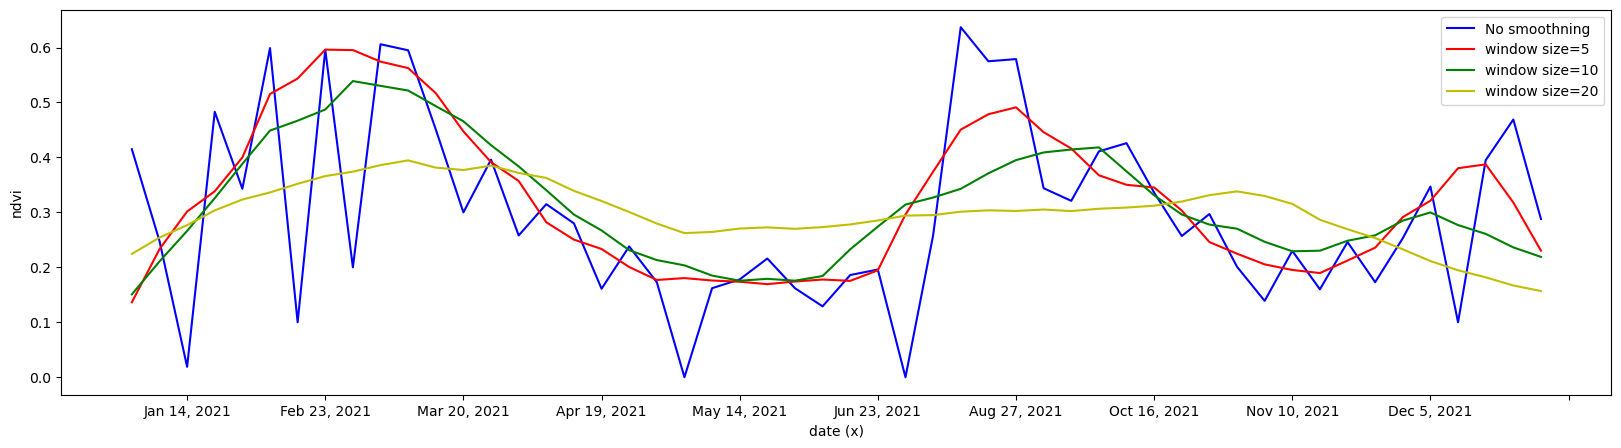

In [95]:
#Plot both original and smooth data
plt.figure(figsize=(20,5))
#plt.xticks(rotation =30)
plt.plot(xs, ys, 'b', label = 'No smoothning')
plt.plot(xs, y_smoving_average, 'r', label = 'window size=5')
plt.plot(xs, y1_smoving_average, 'g', label = 'window size=10')
plt.plot(xs, y2_smoving_average, 'y', label = 'window size=20')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Skip every 2 days

plt.xlabel("date (x)")
plt.ylabel("ndvi")
plt.legend()

import os

# ... (rest of your code)

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# Save the graph as a JPEG file
file_path = "E:/pgd/PGD-GI Study Material/final project/NDVI/python docs/2-08-2023/2-08-2023/moving average4.jpeg"
plt.savefig(file_path, format='jpeg')

plt.show()



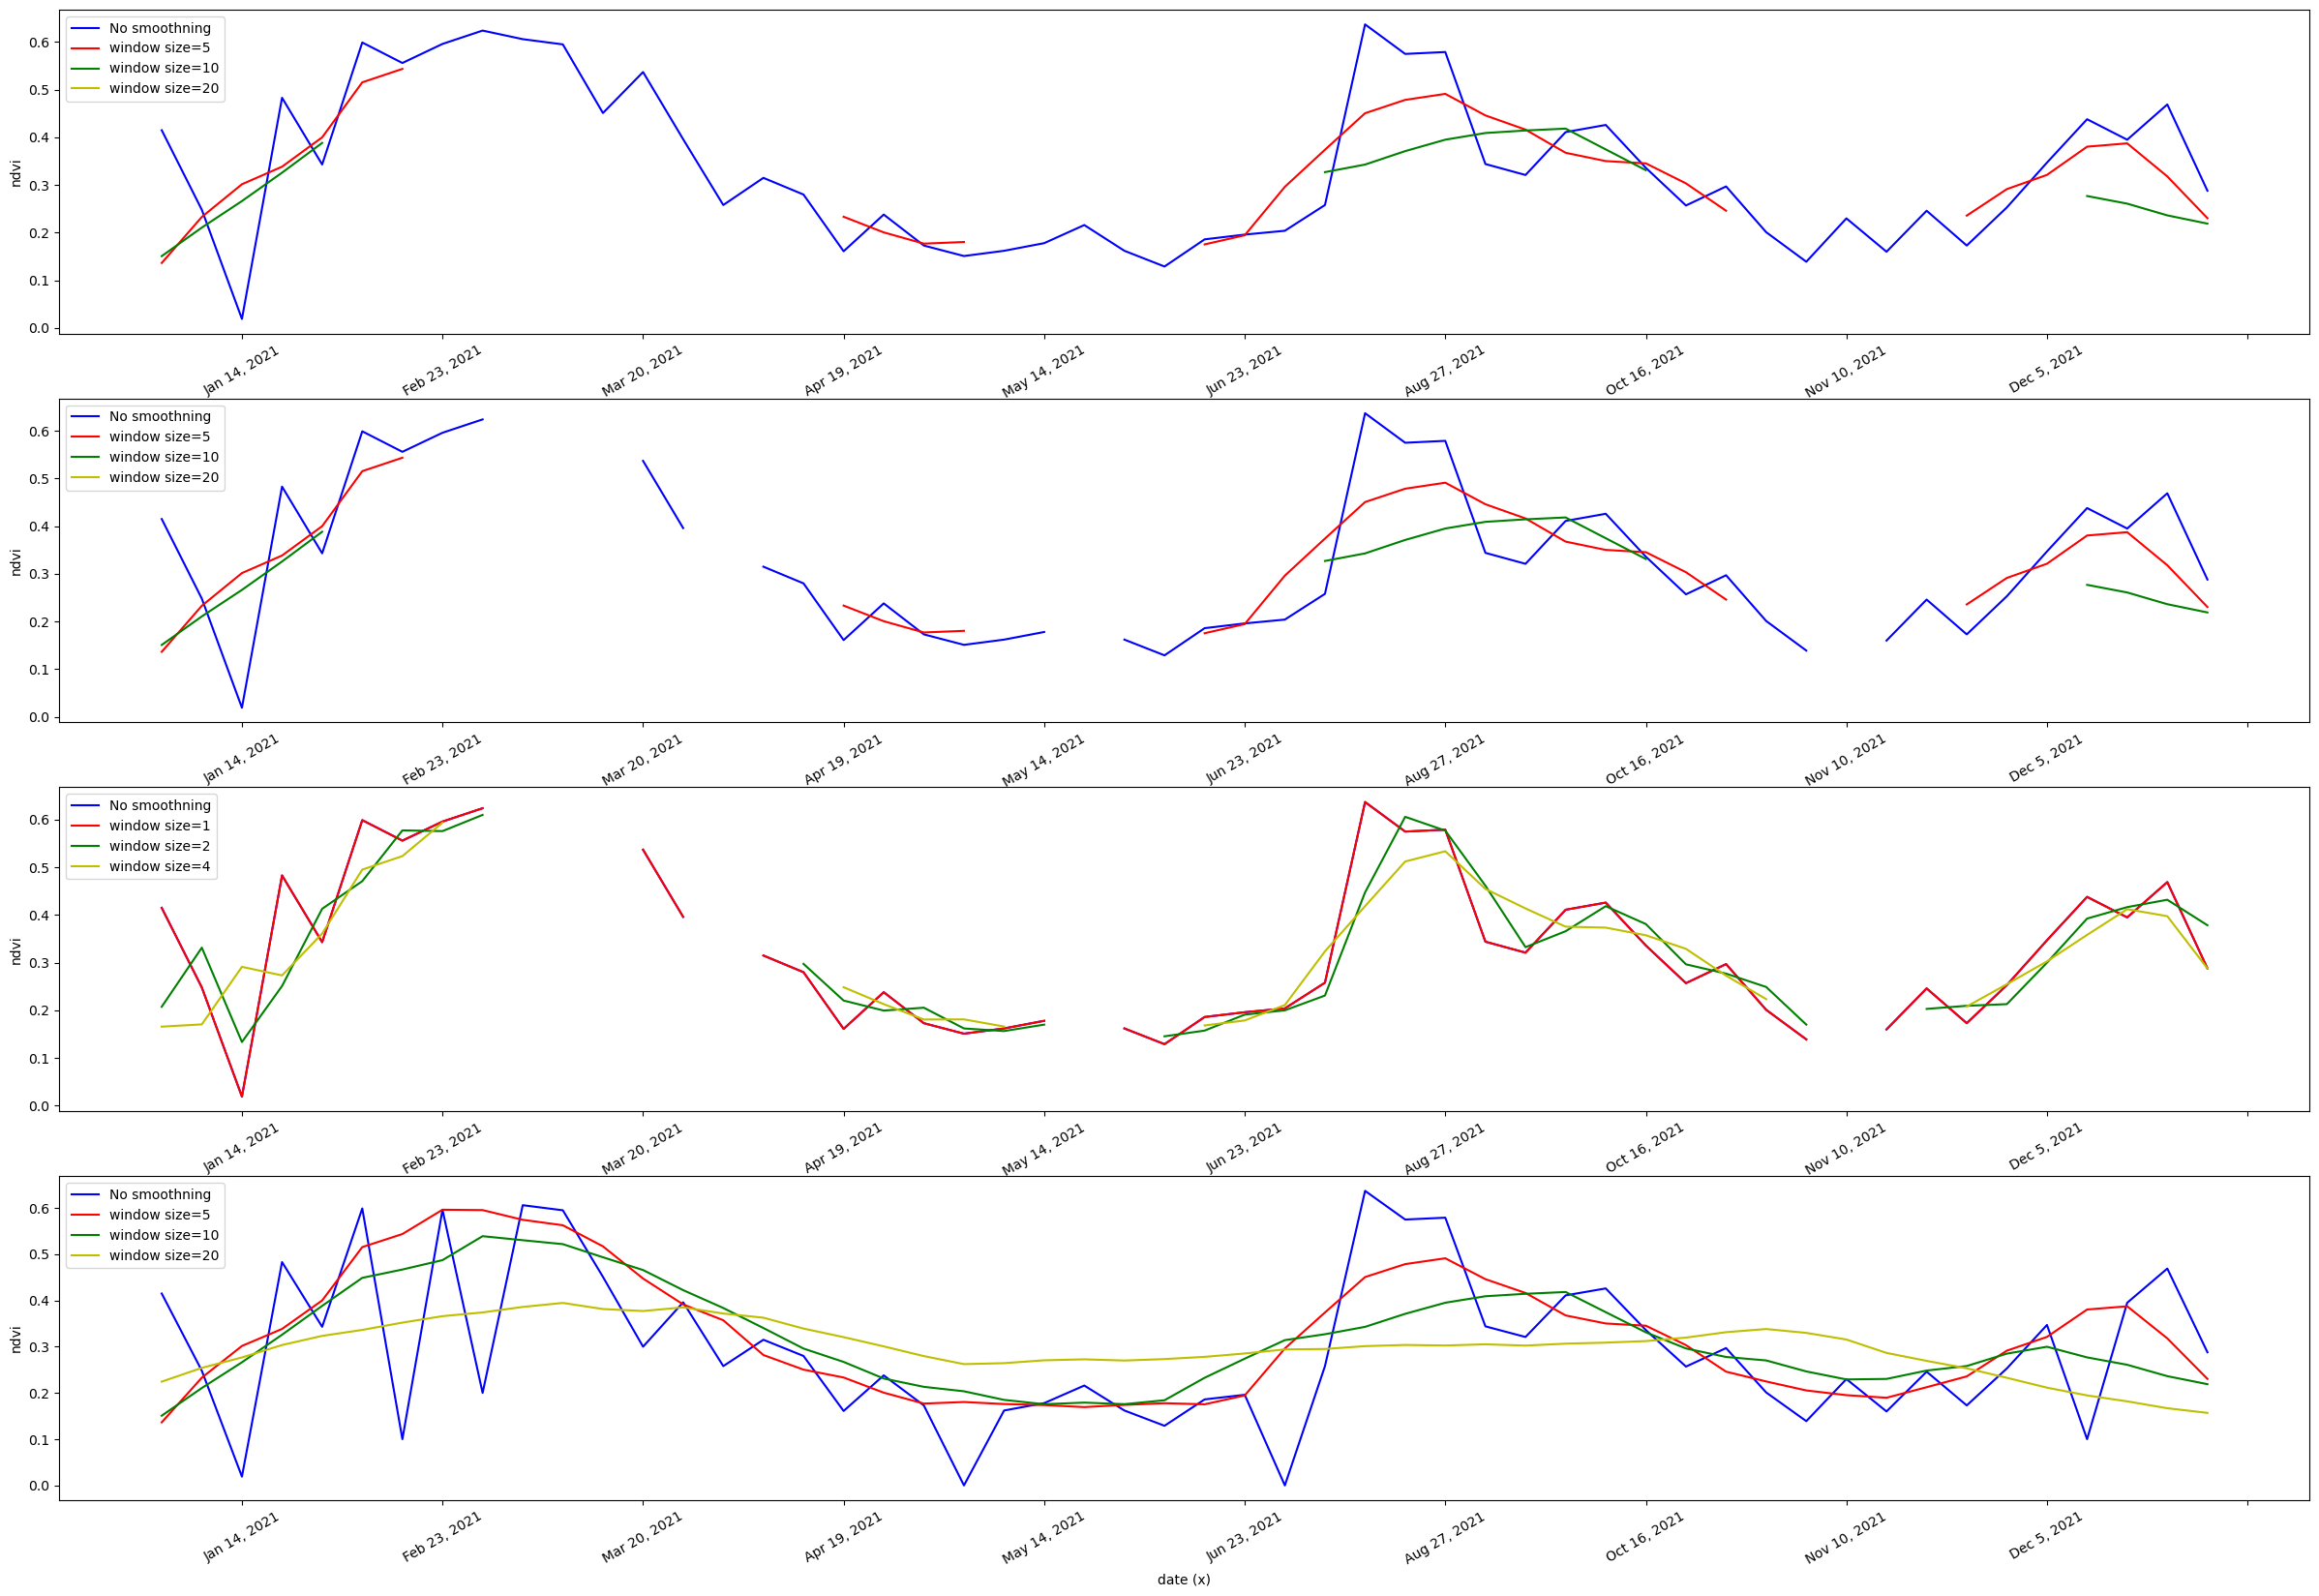

In [63]:
plt.figure(figsize=(30,20))

plt.subplot(411)
plt.xticks(rotation =30)
plt.plot(x, y, 'b', label = 'No smoothning')
plt.plot(x, y_moving_average, 'r', label = 'window size=5')
plt.plot(x, y1_moving_average, 'g', label = 'window size=10')
plt.plot(x, y2_moving_average, 'y', label = 'window size=20')
plt.xlabel("date (x)")
plt.ylabel("ndvi")
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Skip every 2 days

plt.subplot(412)
plt.xticks(rotation =30)
plt.plot(x2, y2, 'b', label = 'No smoothning')
plt.plot(x, y_moving_average, 'r', label = 'window size=5')
plt.plot(x, y1_moving_average, 'g', label = 'window size=10')
plt.plot(x, y2_moving_average, 'y', label = 'window size=20')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Skip every 2 days
plt.xlabel("date (x)")
plt.ylabel("ndvi")

plt.subplot(413)
plt.xticks(rotation =30)
plt.plot(x2, y2, 'b', label = 'No smoothning')
plt.plot(x, ynan_moving_average, 'r', label = 'window size=1')
plt.plot(x, y1nan_moving_average, 'g', label = 'window size=2')
plt.plot(x, y2nan_moving_average, 'y', label = 'window size=4')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Skip every 2 days
plt.xlabel("date (x)")
plt.ylabel("ndvi")

plt.subplot(414)


plt.xticks(rotation =30)
plt.plot(xs, ys, 'b', label = 'No smoothning')
plt.plot(xs, y_smoving_average, 'r', label = 'window size=5')
plt.plot(xs, y1_smoving_average, 'g', label = 'window size=10')
plt.plot(xs, y2_smoving_average, 'y', label = 'window size=20')
plt.legend(loc='upper left')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Skip every 2 days


plt.xlabel("date (x)")
plt.ylabel("ndvi")
plt.show()